In [30]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.autonotebook import tqdm

/var/folders/qt/k5txb7556tz0pk9dmksrt2sr0000gn/T/ipykernel_2071/2807876633.py:23: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Load dataset
titanic = fetch_openml(name='titanic', version=1)
dataset = titanic.frame

## Split train- and test-dataset

In [3]:
data_train, data_test = train_test_split(dataset, test_size=0.2, random_state=99)

# Check shape
data_train.shape, data_test.shape

((1047, 14), (262, 14))

## Pre-inspection

In [4]:
data_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
287,1.0,0,"Sutton, Mr. Frederick",male,61.0,0.0,0.0,36963,32.3208,D50,S,None,46.0,"Haddenfield, NJ"
259,1.0,1,"Seward, Mr. Frederic Kimber",male,34.0,0.0,0.0,113794,26.5500,None,S,7,NaN,"New York, NY"
147,1.0,0,"Harrington, Mr. Charles H",male,NaN,0.0,0.0,113796,42.4000,None,S,None,NaN,None
134,1.0,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1.0,0.0,17453,89.1042,C92,C,5,NaN,"Paris, France / New York, NY"
405,2.0,0,"Fahlstrom, Mr. Arne Jonas",male,18.0,0.0,0.0,236171,13.0000,None,S,None,NaN,"Oslo, Norway Bayonne, NJ"


In [5]:
data_train.describe()

,pclass,age,sibsp,parch,fare,body
count,1047.000000,831.000000,1047.00000,1047.000000,1047.000000,90.000000
mean,2.300860,29.882070,0.51958,0.387775,33.727507,159.388889
std,0.837819,14.594557,1.07258,0.869366,53.839005,100.437995
min,1.000000,0.166700,0.00000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.00000,0.000000,7.895800,70.500000
50%,3.000000,28.000000,0.00000,0.000000,14.454200,154.000000
75%,3.000000,39.000000,1.00000,0.000000,30.847900,255.750000
max,3.000000,80.000000,8.00000,9.000000,512.329200,328.000000


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 287 to 641
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1047 non-null   float64 
 1   survived   1047 non-null   category
 2   name       1047 non-null   object  
 3   sex        1047 non-null   category
 4   age        831 non-null    float64 
 5   sibsp      1047 non-null   float64 
 6   parch      1047 non-null   float64 
 7   ticket     1047 non-null   object  
 8   fare       1047 non-null   float64 
 9   cabin      241 non-null    object  
 10  embarked   1045 non-null   category
 11  boat       387 non-null    object  
 12  body       90 non-null     float64 
 13  home.dest  582 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 101.6+ KB


## Feature selction
- Which features are chosen for modeling and why?

## Feature preparation: Categorical
### Sex

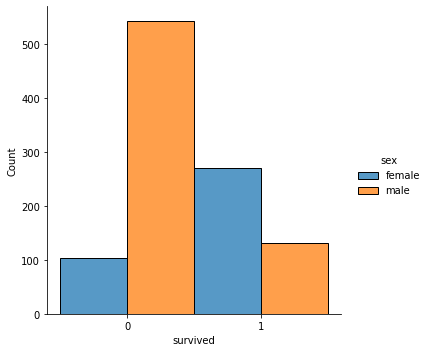

In [7]:
# Plot
sns.displot(data=data_train, x="survived", hue="sex", multiple="dodge")
plt.show()

In [8]:
sex_imp = SimpleImputer(missing_values="", strategy='most_frequent')  # Replace missing values. Todo: Replace evering that is neither "female" nor "male" with a custom imputer
sex_enc = OrdinalEncoder()  # Numerical encoding / Ordinal encoding
sex_std = StandardScaler()  # Standardize

sex_preprocessor = Pipeline(steps=[
    ("sex_imp", sex_imp),
    ("sex_enc", sex_enc),
    ("sex_std", sex_std),
])

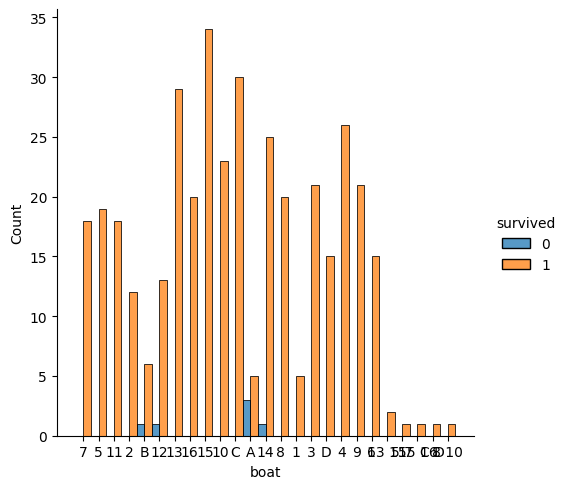

In [9]:
# Plot
sns.displot(data=data_train, x="boat", hue="survived", multiple="dodge")
# sns.displot(data=data_train[data_train['parch']>0], x="parch", hue="survived", multiple="dodge")
plt.show()

### Parch

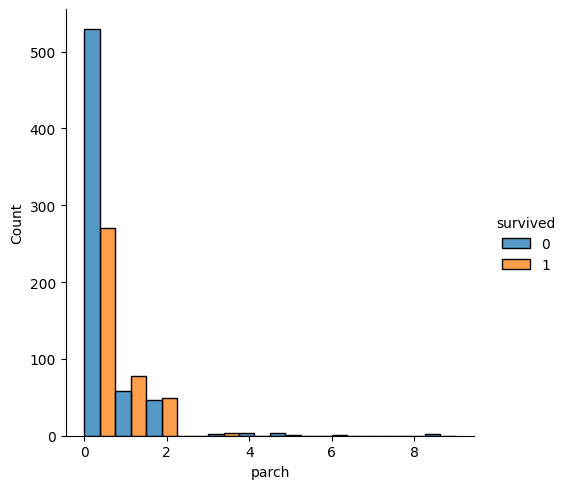

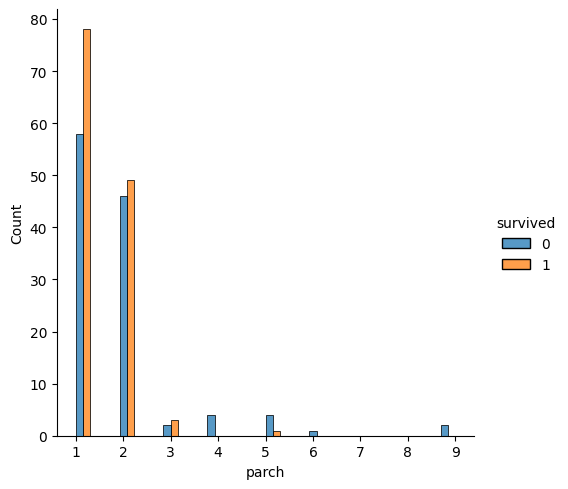

In [10]:
# Plot
sns.displot(data=data_train, x="parch", hue="survived", multiple="dodge")
sns.displot(data=data_train[data_train['parch']>0], x="parch", hue="survived", multiple="dodge")
plt.show()

In [11]:
parch_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  # Replace missing values
parch_enc = OneHotEncoder()  # One hot encoding

parch_preprocessor = Pipeline(steps=[
    ("parch_imp", parch_imp),
    ("parch_enc", parch_enc),
])

## Sibsb

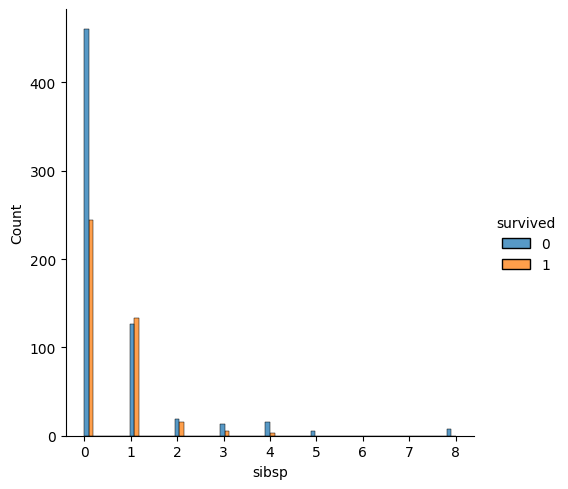

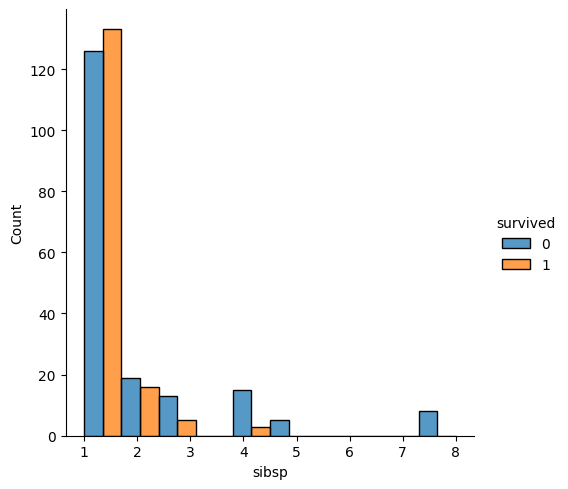

In [12]:
# Plot
sns.displot(data=data_train, x="sibsp", hue="survived", multiple="dodge")
sns.displot(data=data_train[data_train['sibsp']>0], x="sibsp", hue="survived", multiple="dodge")
plt.show()

In [13]:
sibsp_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  # Replace missing values
sibsp_enc = OneHotEncoder()  # One hot encoding

sibsp_preprocessor = Pipeline(steps=[
    ("sibsp_imp", sibsp_imp),
    ("sibsp_enc", sibsp_enc),
])

### Pclass


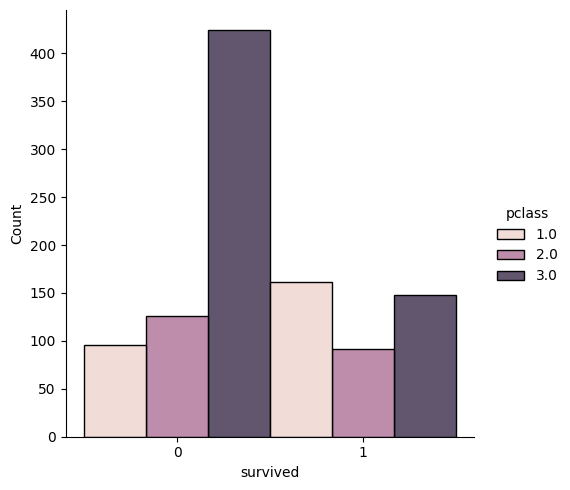

In [28]:
# Plot
sns.displot(data=data_train, x="survived", hue="pclass", multiple="dodge")
plt.show()

In [15]:
pclass_imp = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value=3)  # Replace missing values. Todo: Better use most frequent value?
pclass_std = StandardScaler()  # Standardize

pclass_preprocessor = Pipeline(steps=[
    ("pclass_imp", pclass_imp),
    ("pclass_std", pclass_std),
])

### ticket

In [16]:
data_train['ticket'].value_counts()
# -> Will not be used

CA. 2343         10
PC 17608          6
CA 2144           6
347088            6
382652            6
                 ..
349233            1
367231            1
SC/PARIS 2147     1
349220            1
363611            1
Name: ticket, Length: 779, dtype: int64

### Embarked

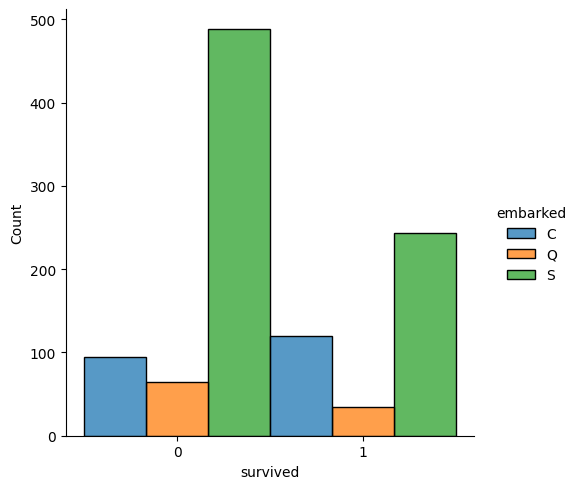

In [29]:
sns.displot(data=data_train, x="survived", hue="embarked", multiple="dodge")
plt.show()

In [18]:
embarked_imp = SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value='C')  # Replace missing values
embarked_enc = OrdinalEncoder()  # Numerical encoding
embarked_std = StandardScaler()  # Standardize

embarked_preprocessor = Pipeline(steps=[
    ("embarked_imp", embarked_imp),
    ("embarked_enc", embarked_enc),
    ("embarked_std", embarked_std),
])

## Feature preparation: Numerical

### Age

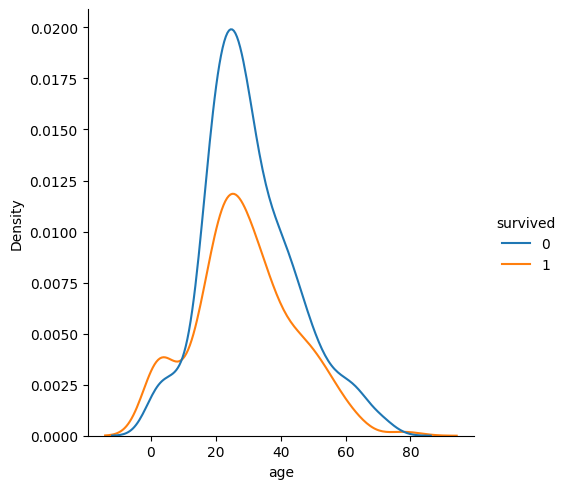

In [19]:
sns.displot(data=data_train, x="age", hue="survived", kind="kde")
plt.show()

In [20]:
age_imp = SimpleImputer(missing_values=np.nan, strategy='mean')  # Impute missing values. Todo: Clculate a mean per personal title and see how it improves the result.
age_std = StandardScaler()  # Standardize

age_preprocessor = Pipeline(steps=[
    ("age_imp", age_imp),
    ("age_std", age_std),
])

### Fare

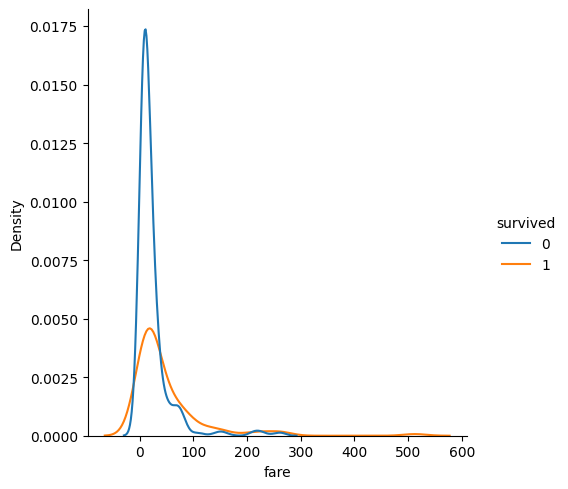

In [21]:
sns.displot(data=data_train, x="fare", hue="survived", kind="kde")
plt.show()

In [22]:
fare_imp = SimpleImputer(missing_values=np.nan, strategy='mean')  # todo: Use multivariate imputer
fare_std = StandardScaler()  # Standardize

fare_preprocessor = Pipeline(steps=[
    ("fare_imp", fare_imp),
    ("fare_std", fare_std),
])

## Feature preparation: Preprocessor pipeline

In [23]:
preprocessor = ColumnTransformer(
    [
        ('sex_preprocessor', sex_preprocessor, ['sex',]),
        ('pclass_preprocessor', pclass_preprocessor, ['pclass',]),
        ('parch_preprocessor', parch_preprocessor, ['parch',]),
        ('sibsp_preprocessor', sibsp_preprocessor, ['sibsp',]),
        ('embarked_preprocessor', embarked_preprocessor, ['embarked',]),
        ('age_preprocessor', age_preprocessor, ['age',]),
        ('fare_preprocessor', fare_preprocessor, ['fare',]),
    ],
    remainder='drop'
)

## Modelling

In [25]:
# Split datasets into features and labels
X_train = data_train.drop(['survived'], axis='columns')
y_train = data_train['survived']
X_test = data_test.drop(['survived'], axis='columns')
y_test = data_test['survived']

# Check shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1047, 13), (1047,), (262, 13), (262,))

In [24]:
classifiers = {
        "Nearest Neighbors": KNeighborsClassifier(3),
        "Linear SVC": SVC(kernel="linear", C=0.025),
        "RBF SVC": SVC(gamma=2, C=1),
        "Gaussian Process": GaussianProcessClassifier(1.0 * RBF(1.0)),
        "Decision Tree": DecisionTreeClassifier(max_depth=5),
        "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        "Neural Net": MLPClassifier(alpha=1, max_iter=1000),
        "AdaBoost": AdaBoostClassifier(),
        "Naive Bayes": GaussianNB(),
        "QDA": QuadraticDiscriminantAnalysis(),
}

In [32]:
# Training and Cross-Validation of classifiers
scores = {}
X_train_prep = preprocessor.fit_transform(X=X_train)
for clf in tqdm(classifiers.keys()):
    cv_scores = cross_val_score(
        estimator=classifiers[clf], 
        X=X_train_prep, 
        y=y_train, 
        scoring='accuracy',
        cv=10)
    scores[clf] = np.mean(cv_scores) 

sorted_scores = sorted([(value, key) for (key,value) in scores.items()], reverse=True)
for s in sorted_scores:
    print(f"{s[1]}: {s[0]:.3f}")


 80%|████████  | 8/10 [00:48<00:10,  5.41s/it]/Users/martin/.local/share/virtualenvs/playground-MkuFeJM_/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/martin/.local/share/virtualenvs/playground-MkuFeJM_/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/martin/.local/share/virtualenvs/playground-MkuFeJM_/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/martin/.local/share/virtualenvs/playground-MkuFeJM_/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/martin/.local/share/virtualenvs/playground-MkuFeJM_/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarni

Gaussian Process: 0.803
Neural Net: 0.801
Decision Tree: 0.788
AdaBoost: 0.783
Linear SVC: 0.776
Nearest Neighbors: 0.768
Random Forest: 0.757
RBF SVC: 0.749
QDA: 0.575
Naive Bayes: 0.404


In [ ]:
# full_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', clf),  # TODO
# ])

# full_pipeline.fit(X_train, y_train)
# score = full_pipeline.score(X_test, y_test)